### Objective: Make an exploratory data analysis of the provided dataset: how many classes, how many examples per class, word distribution (e.g. TF-IDF), etc. You should document your analysis with proper visualizations.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_json('./data/data.jsonl', lines=True)


data.head()

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


In [7]:
emotions_to_int = {
    'anger': 0,
    'fear': 1,
    'joy': 2,
    'love': 3,
    'sadness': 4,
    'surprise': 5
}

int_to_emotions = {v: k for k, v in emotions_to_int.items()}

emotions_count =  data['label'].explode().value_counts()
# replace the int values with the emotions
emotions_count.index = emotions_count.index.map(int_to_emotions)
emotions_count

label
fear        141067
anger       121187
love         57317
sadness      47712
joy          34554
surprise     14972
Name: count, dtype: int64

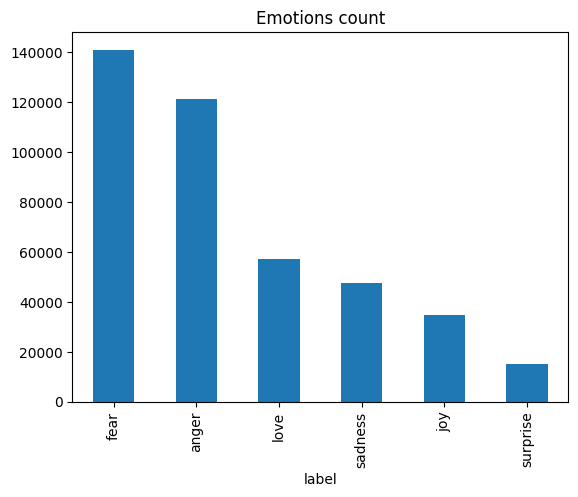

In [10]:
# plot the emotions count
emotions_count.plot(kind='bar', title='Emotions count')
plt.show()

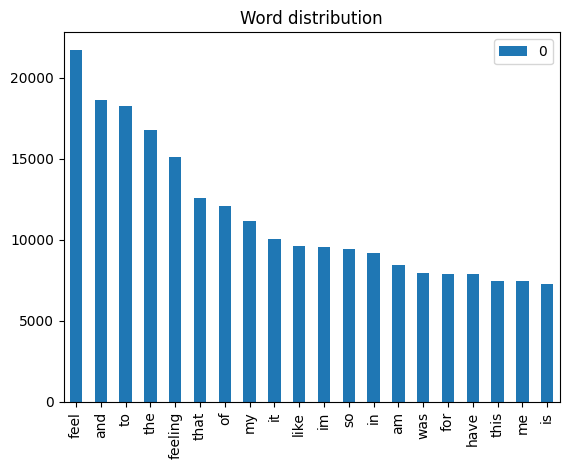

In [11]:
# plot the word distribution
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])
words = vectorizer.get_feature_names_out()
word_distribution = X.sum(axis=0)
word_distribution = pd.DataFrame(word_distribution, columns=words)
word_distribution = word_distribution.T
word_distribution = word_distribution.sort_values(by=0, ascending=False)
word_distribution = word_distribution.head(20)
word_distribution.plot(kind='bar', title='Word distribution')
plt.show()

etc.... foi só mesmo para começar :D
que mais será giro fazer? wordcloud, por emoção, 